In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from functools import partial
from sklearn.svm import SVC

In [2]:
def linear_kernel(X, Y): 
    return np.dot(X, Y.T)

def gaussian_kernel(X, Y, gamma=0.5): 
    return np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - Y, axis=2) ** 2) 

def polynomial_kernel(X, Y, degree=2, coef0=0): 
    return (np.dot(X, Y.T) + coef0) ** degree

def train_and_evaluate_svm(X_train, y_train, X_test, kernel):
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return svm, y_pred

In [3]:
# Iris
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=0)

for kernel in [linear_kernel, partial(gaussian_kernel, gamma=2.0), partial(polynomial_kernel, degree=2, coef0=0)]:
    _, y_pred = train_and_evaluate_svm(X_train_iris, y_train_iris, X_test_iris, kernel)
    acc = accuracy_score(y_test_iris, y_pred)
    kernel_name = kernel.func.__name__ if hasattr(kernel, 'func') else kernel.__name__
    print(f"dataset:Iris, kernel:{kernel_name}, acc:{acc}")

dataset:Iris, kernel:linear_kernel, acc:0.9777777777777777
dataset:Iris, kernel:gaussian_kernel, acc:0.9777777777777777
dataset:Iris, kernel:polynomial_kernel, acc:0.9555555555555556


In [4]:
# Sonar
sonar_data = pd.read_csv("./sonar.all-data.csv", header=None)
X_sonar, y_sonar = X = sonar_data.iloc[:, :-1].values, sonar_data.iloc[:, -1].values
X_train_sonar, X_test_sonar, y_train_sonar, y_test_sonar = train_test_split(X_sonar, y_sonar, test_size=0.3, random_state=0)

for kernel in [linear_kernel, partial(gaussian_kernel, gamma=2.0), partial(polynomial_kernel, degree=2, coef0=0)]:
    _, y_pred = train_and_evaluate_svm(X_train_sonar, y_train_sonar, X_test_sonar, kernel)
    acc = accuracy_score(y_test_sonar, y_pred)
    kernel_name = kernel.func.__name__ if hasattr(kernel, 'func') else kernel.__name__
    print(f"dataset:Iris, kernel:{kernel_name}, acc:{acc}")

dataset:Iris, kernel:linear_kernel, acc:0.8095238095238095
dataset:Iris, kernel:gaussian_kernel, acc:0.873015873015873
dataset:Iris, kernel:polynomial_kernel, acc:0.873015873015873


-----
# Draw the support vectors

Three support vectors:
 [[-2.35575405 -0.03728186]
 [-0.90646986 -0.75609337]
 [-2.30273318  0.09870885]]


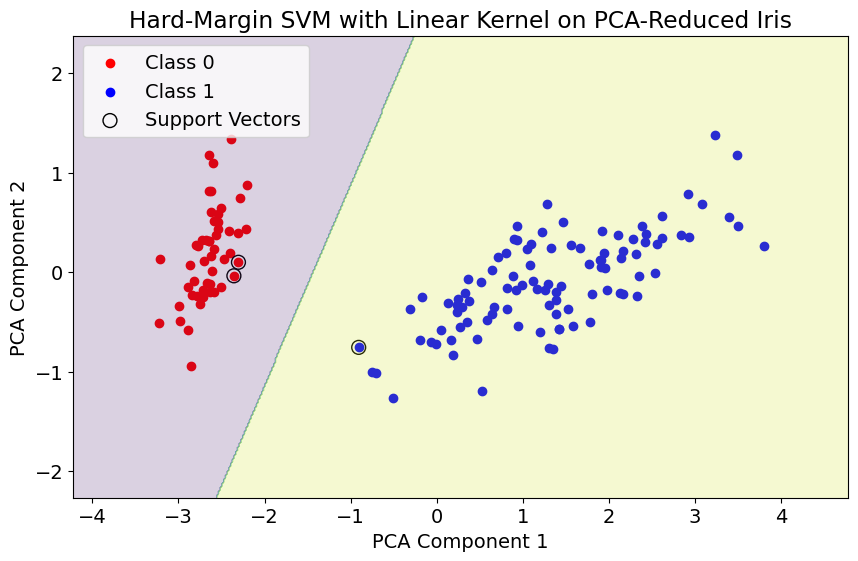

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
# Class 0 remains 0, classes 1 and 2 become 1
y_iris_binary = np.where(y_iris == 0, 0, 1)  
# Apply PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)
# Split into training and testing sets
X_train, y_train = X_pca, y_iris_binary
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y_iris_binary, test_size=0.01, random_state=0)
# Train hard-margin SVM with linear kernel by setting a large C value
svm = SVC(kernel='linear', C=1e10)
svm.fit(X_train, y_train)

# Print support vectors
distances = svm.decision_function(X_train) 
closest_indices = np.argsort(np.abs(distances))[:3]
print("Three support vectors:\n", X_train[closest_indices])

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 14})  # Update the font size
colors = ['red', 'blue']
for i, color in enumerate(colors):
    mask = y_train == i
    plt.scatter(X_train[mask, 0], X_train[mask, 1], color=color, label=f'Class {i}')
# Plot support vectors
plt.scatter(X_train[closest_indices][:, 0], X_train[closest_indices][:, 1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')
# Create a grid to plot decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('Hard-Margin SVM with Linear Kernel on PCA-Reduced Iris')
plt.show()